# U.S. Medical Insurance Costs

#### Portfolio project made during the "Data Science Foundation" course at Codecademy

Serhiy Kobyakov, version: April 13, 2023

A csv file provided by Codecademy will be investigated in this project. The file contains records on medical insurance costs, age, number of children, bmi, sex, smoking and region.


## Project goals:
* Check the data for consistency
* Perform descriptive analysis on the given data
* Find out how variables (age, nr of children, bmi, sex, smoking) impact the cost of medical insurance
* Create a list of recommendations to reduce health insurance costs based on obtained results

In [1]:
# Some preliminary imports and definitions:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


figsize = (18, 6)


def count_in_limits(the_list, min, max):
    """count the number of values in the list which has values between min and max"""
    count = 0
    for i in range(len(the_list)):
        if the_list[i] >= min and the_list[i] < max:
            count += 1
    return count


def print_min_max(the_list):
    """function returns min and max values of the numerical lists"""
    return str(min(the_list)) + ' .. ' + str(max(the_list))


def hist_from_list_of_integers(the_list, title, ylabel, xlabel, labels):
    """plot histogram out of the list of integers"""
    histogram = {x:the_list.count(x) for x in list(set(the_list))}
    plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    barcontainer = plt.bar(histogram.keys(), histogram.values())
    if labels:
        plt.bar_label(barcontainer, histogram.values(), label_type='edge')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

    
def hist_from_list_of_floats(the_list, title, ylabel, xlabel, nr_of_bins, width, labels):
    """plot histogram out of the list of floats"""
    bin_edges = np.linspace(np.floor(min(the_list)), np.ceil(max(the_list)), num=nr_of_bins)
    counts, bins = np.histogram(the_list, bin_edges)
    the_width = width * (bins[1] - bins[0])
    plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    barcontainer = plt.bar(bins[:-1], counts, width=the_width)
    if labels:
        plt.bar_label(barcontainer, counts, label_type='edge')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


def histogram_categorical(the_list, title, ylabel, xlabel, labels):
    """plot histogram out of the list of categorical data"""    
    histogram = {x:the_list.count(x) for x in list(set(the_list))}
    plt.figure(figsize=(3*len(histogram.keys()), 6))
    ax = plt.axes()
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    barcontainer = plt.bar(histogram.keys(), histogram.values(), width=0.5)
    if labels:
        plt.bar_label(barcontainer, histogram.values(), label_type='edge')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [2]:
# Importing the data and checking it for consistency:
data_file_name = "insurance.csv"
print(f"Reading data from file {data_file_name}:")
with open(data_file_name) as f:
    raw_data = f.readlines()

i = 0
sexes, smokers, regions = set(), set(), set()
# no need to build a complex data structures
# since there is only one set of data
# let's use lists!
age, sex, bmi, children, smoker, region, charges = [], [], [], [], [], [], []
for line in raw_data:
    if i != 0:
        variables = line.split(',')
        
        # check for missing data in the row
        if len(variables) != 7:
            print(f"Warning: line {i}: got {len(variables)} instead of 7 variables!")
        
        # read variables
        age.append(int(variables[0]))
        sex.append(variables[1])
        bmi.append(float(variables[2]))
        children.append(int(variables[3]))
        smoker.append(variables[4])
        region.append(variables[5].capitalize())
        charges.append(float(variables[6]))
        
        # check categorical variables
        sexes.add(variables[1])
        smokers.add(variables[4])
        regions.add(variables[5])
    i += 1

print(f"  {i} lines has been read including header")
print(f"  {len(age)} records has been read into variables (must 'be total lines' - 1 for header)")
print("\nPossible values of categorical variables:")
print(f"  sex: {sexes}")
print(f"  smoker: {smokers}")
print(f"  region: {regions}")
print(f"\nAge range: {print_min_max(age)}")
print(f"Nr of children range: {print_min_max(children)}")
print(f"BMI range: {print_min_max(bmi)}")
print(f"Insurance cost range: {print_min_max(charges)}")

Reading data from file insurance.csv:
  1339 lines has been read including header
  1338 records has been read into variables (must 'be total lines' - 1 for header)

Possible values of categorical variables:
  sex: {'female', 'male'}
  smoker: {'no', 'yes'}
  region: {'southeast', 'northwest', 'northeast', 'southwest'}

Age range: 18 .. 64
Nr of children range: 0 .. 5
BMI range: 15.96 .. 53.13
Insurance cost range: 1121.8739 .. 63770.42801


### Descriptive analysis

#### Data file
There are seven columns in the file representing age, sex, bmi, children, smoker, region and charges for each person in row. Three columns contain categorical data: sex, smoker and region, the rest of the columns are numerical. No missing data has been detected, all variables in records are within reasonable limits.


There are 1338 records describing some anonymous US citizens in the file.


Next I want to check out every variable for value distribution.


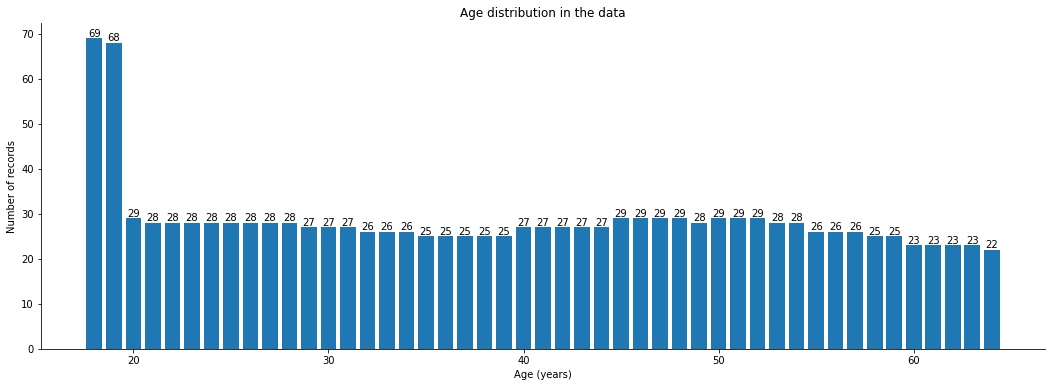

In [3]:
hist_from_list_of_integers(age, 'Age distribution in the data', 'Number of records', 'Age (years)', True)

The ages in the file are spread between 18 and 64 years. The records are distributed between ages almost uniformely. There are around 26 records for each age except for the first two, containing 69 and 68 records respectively.

18 and 19 year records are overrepresented in the data and they must be reduced to approximately 26 records each (if the dataset will be further used for quantitative modeling with the age as a parameter under consideration).

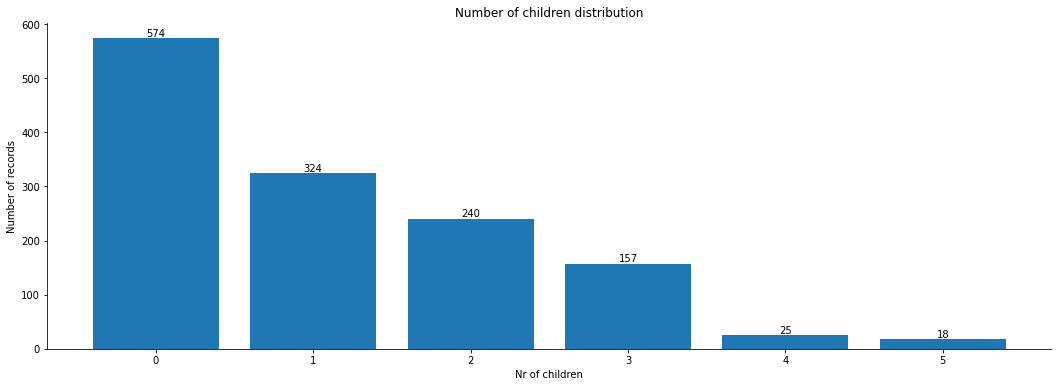

In [4]:
hist_from_list_of_integers(children, 'Number of children distribution', 'Number of records', 'Nr of children', True)

The possible number of children are between 0 and 5. Persons with no children constitute the largest group of records: 574 persons (2/5 of all records). The higher the number of children - the less records are in the file.

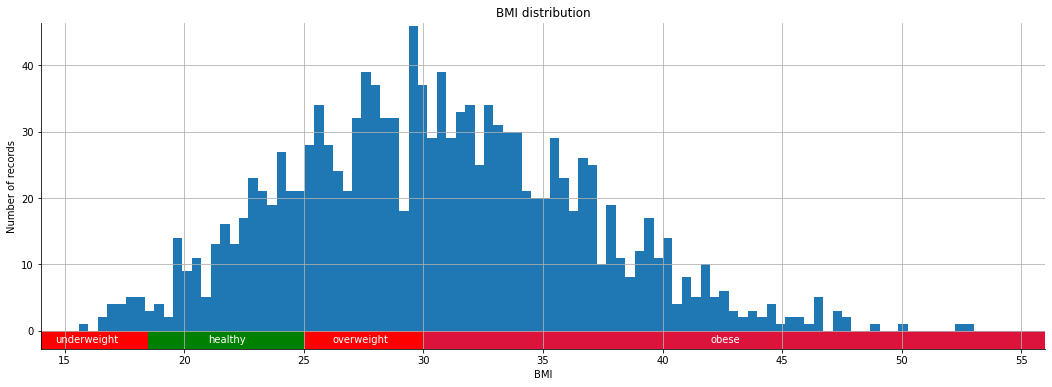

Number of records in categories:
  underweight: 20   ( 1.5%)
  healthy:     225  (16.8%)
  overweight:  386  (28.8%)
  obese:       707  (52.8%)


In [5]:
bin_edges = np.linspace(np.floor(min(bmi)), np.ceil(max(bmi)), num=100)
counts, bins = np.histogram(bmi, bin_edges)
the_width = bins[1] - bins[0]
plt.figure(figsize=figsize)
ax = plt.axes()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.grid()
ax.set_xlim(14.0, 56)
ax.set_ylim(bottom=-0.06*max(counts), top=1.01*max(counts))
ymin, ymax, text_level = 0, 0.06 / 1.11, -0.04*max(counts)
ax.axvspan(13, 18.5, ymin=ymin, ymax=ymax, facecolor='red')
ax.text(14.6, text_level, 'underweight', color='white')
ax.axvspan(18.5, 25, ymin=ymin, ymax=ymax, facecolor='green')
ax.text(21, text_level, 'healthy', color='white')
ax.axvspan(25, 30, ymin=ymin, ymax=ymax, facecolor='red')
ax.text(26.2, text_level, 'overweight', color='white')
ax.axvspan(30, 56, ymin=ymin, ymax=ymax, facecolor='crimson')
ax.text(42, text_level, 'obese', color='white')
barcontainer = plt.bar(bins[:-1], counts, width=the_width)
plt.xlabel('BMI')
plt.ylabel('Number of records')
plt.title('BMI distribution')
plt.show()

print("Number of records in categories:")
underw = count_in_limits(bmi, 0, 18.5)
print(f"  underweight: {str(underw).ljust(4)} ( {100 * underw / len(bmi):.1f}%)")
healthy = count_in_limits(bmi, 18.5, 25)
print(f"  healthy:     {str(healthy).ljust(4)} ({100 * healthy / len(bmi):.1f}%)")
overw = count_in_limits(bmi, 25, 30)
print(f"  overweight:  {str(overw).ljust(4)} ({100 * overw / len(bmi):.1f}%)")
obese = count_in_limits(bmi, 30, 60)
print(f"  obese:       {str(obese).ljust(4)} ({100 * obese / len(bmi):.1f}%)")

The BMI distribution is almost symmetrical with center at 29 and spread between 15 and 50. The distribution is slightly skewed to the right which is almost invisible to the eye. There are also few outliers with BMI > 50.

The distribution maximum is on the border between overweight and obese ranges. The healthy range contain only 16.8% of all records, while overweight and obese make up 81.7% of records.

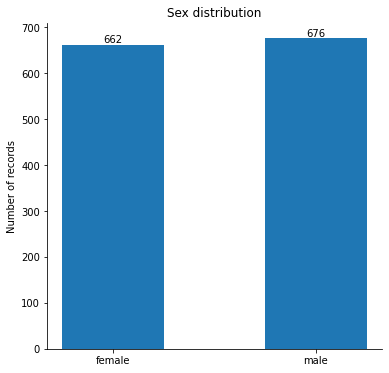

There are 676 male and 662 female records in the data (49.5% females).


In [6]:
histogram_categorical(sex, "Sex distribution", "Number of records", "", True)
male_count = 0
for i in range(len(sex)):
    if sex[i] == 'male':
        male_count += 1
print(f"There are {male_count} male and {len(sex) - male_count} female records in the data ({100 * (len(sex) - male_count) / len(sex):.1f}% females).")

The data are quite balanced in terms of the ratio of men and women.

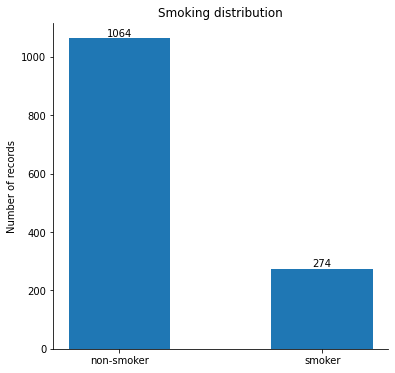

In [7]:
# let's make the data look self-explanatory by substitute 'yes' and 'no' by 'smoker' and 'non-smoker':
smokers = ['smoker' if x == 'yes' else 'non-smoker' for x in smoker]
histogram_categorical(smokers, "Smoking distribution", "Number of records", "", True)

There are 274 smokers and 1064 non-smokers in the data.

The data must be balanced if the dataset will be further used for quantitative modeling with the smoking as a parameter under consideration

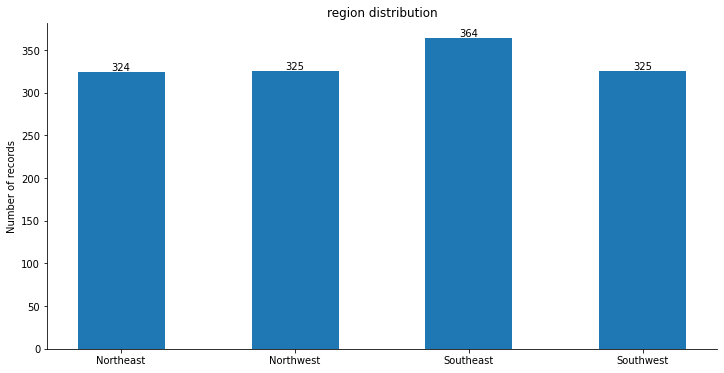

In [8]:
histogram_categorical(region, "region distribution", "Number of records", "", True)

There are 324 records of Northeast, 325 of Southwest and Northwest and 364 of Southeast.

The latest category has 40 more records (12% more) than the previous three. The data must be balanced if the dataset will be further used for quantitative modeling with the region as a parameter under consideration

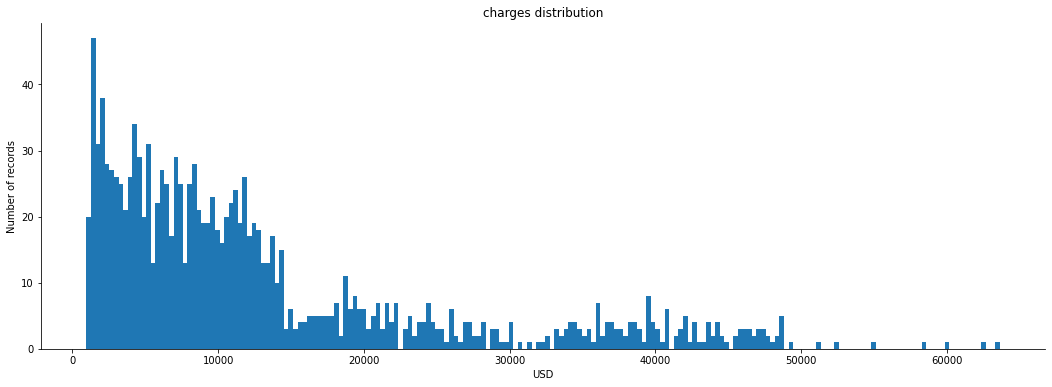

The median is: 9382.033 USD
Number of records in the ranges:
  below 15000   : 980
  15000 .. 31000: 202
  above 31000   : 156


In [9]:
hist_from_list_of_floats(charges, 'charges distribution', 'Number of records', 'USD', 200, 1, False)
print(f"The median is: {np.median(charges)} USD")
print("Number of records in the ranges:")
print(f"  below 15000   : {len([x for x in charges if x < 15_000])}")
print(f"  15000 .. 31000: {len([x for x in charges if 15_000 < x <= 31_000])}")
print(f"  above 31000   : {len([x for x in charges if 31_000 < x])}")

The insurance cost is distributed between 1121 and 63770 dollars. The distribution is hardly skewed to the right, the major part of the records show insurance cost below 50000 dollars and only 7 - above. The first half of the records lie below 9400 USD.

At the first sight the data is divided into three parts: before 15000, between 15000 and 31000 and above 31000. The largest one by volume (3/4 of all records) is at the left, where the insurance cost is lower.



###  How insurance cost depends on variables?

I'll make the cost-to-variable scatter plots in order to visualize a correlation between them:

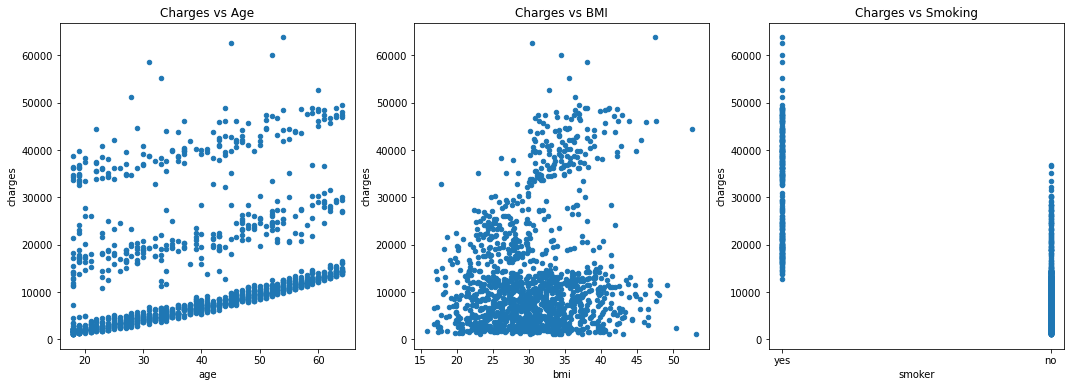

In [10]:
# read the file to dataframe
# so plotting data would be easier below
df = pd.read_csv(data_file_name)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
df.plot.scatter(y='charges', x='age', title='Charges vs Age', ax=ax1)
df.plot.scatter(y='charges', x='bmi', title='Charges vs BMI', ax=ax2)
df.plot.scatter(y='charges', x='smoker', title='Charges vs Smoking', ax=ax3)
plt.show()

Some plots show correlation between variables:

#### Charges vs Age

The charges-age correlation is clearly visible on the plot. Insurance cost depend on age in nonlinear manner (see how data points form an arc on the bottom of the plot, which corresponds to the minimal charges). Although the arc is not strongly curved, one can say that there is nonlinear penalty for age, older persons pay slightly more money for insurance than it may be predicted using linear age coefficient. The minimal insurance cost for older persons is for at least 13000 larger than for the youngest ones.

Above "the ark" there are two similar groups of records, which correlates with the shape of insurance costs distribution shown above. I'll get back to this later in the report.

The clear charges-age correlation show that the age is among the main factors which influence insurance cost

#### Charges vs BMI

There is no strong visual correlation between charges and bmi, though slight positive correlation can be suggested. It is worth mention that the data is not balanced by bmi values among the records, so no strong visible correlation should not be expected in this case.

#### Charges vs Smoking

This plot shows that the minimal insurance cost is higher for at least 11000 USD for those who smokes.

The data segregation in "charges distribution" plot may be caused by other variable, which have strong influence on charges.

In order to check this hypothesis I'll try to plot charges distribution dividing smokers and non-smokers is separate categories. 

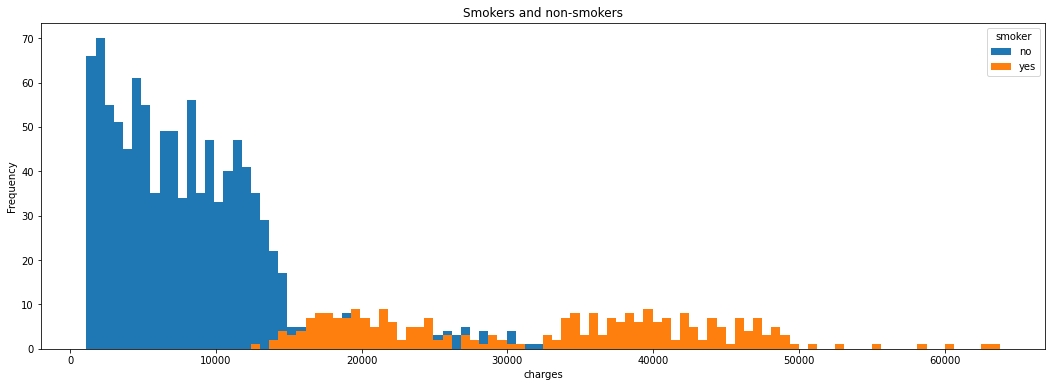

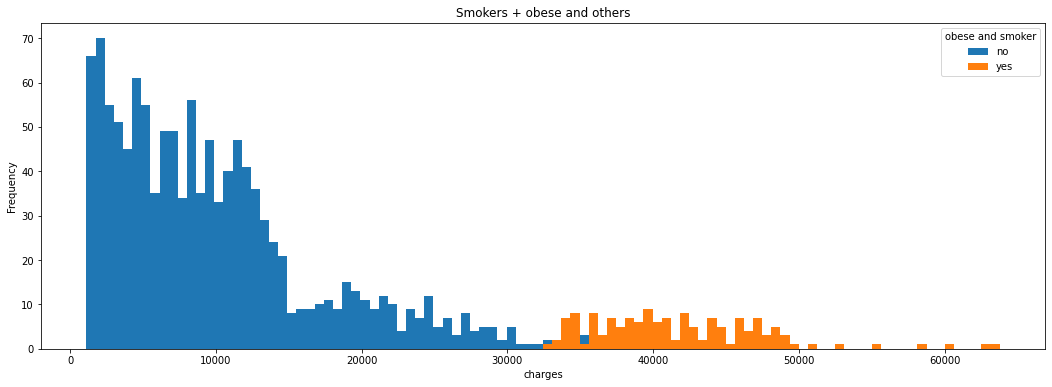

In [11]:
# convert categorical variables to numerical values
df.smoker = pd.Categorical(df.smoker)
df['smoker_n'] = df.smoker.cat.codes
df['obese and smoker'] = df.apply(lambda row: 'yes' if row.smoker_n == 1 and row.bmi > 30 else 'no', axis=1)

df.pivot(columns='smoker', values='charges').plot.hist(bins=100, title='Smokers and non-smokers', figsize=figsize)
plt.xlabel('charges')
plt.show()

df.pivot(columns='obese and smoker', values='charges').plot.hist(bins=100, title='Smokers + obese and others', figsize=figsize)
plt.xlabel('charges')
plt.show()

The last two plots explain why charges distribution is divided into three ranges. The first range (less than 15000 USD) belong to non-smoking persons. The next range (15000 .. 31000 USD) belong to those who smoke but their BMI is below 30, which is below obese category. And the last range (above 31000 USD) contain records of persons who are both obese and smokers.

There are also few records of non-smokers, which lie above 15000 USD border (see the "Smokers and non-smokers" plot). I haven't found the reason for that while analyzing the data. There may be some other factors which can increase the charges, other than those found in the data file.

## Health insurance cost reduction recommendations

Having in mind the information shown above one may infer a list of suggestions which can lower the cost of health insurance.

One cannot change all the variables at our will. For example the age only increases with time, there is no way at the moment to get younger. Region , number of children and sex is out of possible discussion here due to obvious reasons.

So any recommendations should only address smoking and obesity. In the order of importance:

**1. Quit smoking (if you haven't already)**

**2. Keep your weight in healthy range**